In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Hp i5\Desktop\Task Data\bank-full.csv", sep=';')

# Preview the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Check for missing values
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

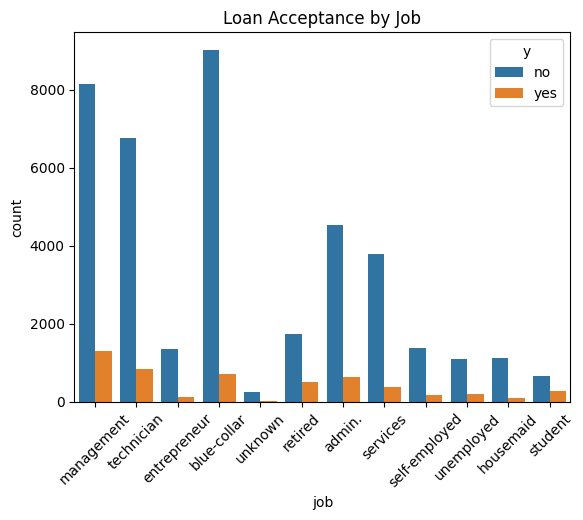

In [6]:

# Explore categorical feature distribution
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Loan Acceptance by Job')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical, drop_first=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)


C:\Users\Hp i5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print("Logistic Regression:\n", classification_report(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))

print("\nDecision Tree:\n", classification_report(y_test, tree_preds))
print(confusion_matrix(y_test, tree_preds))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

[[11656   310]
 [ 1054   544]]

Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.65      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

[[11667   299]
 [ 1043   555]]


In [11]:
# For logistic regression
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
top_positive = coefficients.sort_values(ascending=False).head(10)
top_negative = coefficients.sort_values().head(10)

print("Top Positive Influences:\n", top_positive)
print("\nTop Negative Influences:\n", top_negative)


Top Positive Influences:
 poutcome_success      1.950330
month_mar             0.750560
month_oct             0.685875
month_sep             0.498242
job_retired           0.450392
job_student           0.209400
month_dec             0.185079
education_tertiary    0.144997
month_jun             0.051029
contact_telephone     0.044876
dtype: float64

Top Negative Influences:
 contact_unknown    -1.264864
poutcome_unknown   -1.160412
month_jul          -0.777169
month_nov          -0.770982
month_aug          -0.713737
housing_yes        -0.676731
loan_yes           -0.675674
month_jan          -0.551587
month_may          -0.412820
marital_married    -0.402983
dtype: float64
